In [2]:
import numpy as np
import torch
import torch.nn as nn
from sklearn import datasets
import matplotlib.pyplot as plt

In [36]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_blobs(n_samples=n_pts, centers=centers, cluster_std=0.4)

In [68]:
x_data = torch.Tensor(X)
y_data = torch.Tensor(y)
y_data = y_data.view(len(X), -1)

In [37]:
y == 1

array([False, False, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False, False,  True,
       False,  True, False, False, False,  True,  True,  True,  True,
       False, False,  True,  True, False,  True, False,  True,  True,
        True, False, False, False, False,  True, False, False, False,
       False,  True, False, False,  True,  True, False, False,  True,
        True, False,  True,  True, False, False,  True, False,  True,
       False,  True, False,  True, False, False,  True, False, False,
        True, False,  True,  True,  True,  True, False, False,  True,
        True, False, False,  True,  True, False,  True, False, False,
        True, False, False, False,  True, False,  True,  True,  True,
       False])

In [38]:
def scatter_plot(X, y):
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1])

In [82]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        pred = torch.sigmoid(self.linear(x))
        return pred
    
    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0

In [83]:
linear_model = Model(2, 1)

In [84]:
print(list(linear_model.parameters()))

[Parameter containing:
tensor([[-0.5643, -0.0765]], requires_grad=True), Parameter containing:
tensor([-0.6888], requires_grad=True)]


In [85]:
def get_params(model):
    [w, b] = linear_model.parameters()
    w1, w2 = w.view(2)
    return (w1.item(), w2.item(), b[0].item())

In [86]:
get_params(linear_model)

(-0.5642701387405396, -0.07654350996017456, -0.6888468265533447)

In [87]:
def plot_fit(model, X, y):
    w1, w2, b = get_params(model)
    x1 = np.array([-2.0, 2.0])
    x2 = (w1 * x1 + b) / -w2
    plt.plot(x1, x2, 'r')
    scatter_plot(X, y)

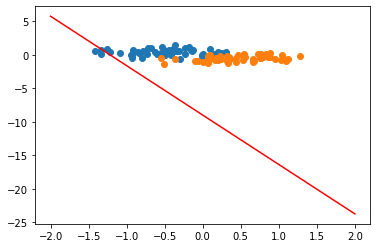

In [88]:
plot_fit(linear_model, X, y)

In [89]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(linear_model.parameters(), lr=0.01)

In [90]:
epochs = 1000
losses = []

for i in range(epochs):
    y_pred = linear_model.forward(x_data)
    loss = criterion(y_pred, y_data)
    losses.append(loss.item())
    print("epoch: ", i, "loss: ", loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  0 loss:  0.8823362588882446
epoch:  1 loss:  0.880540668964386
epoch:  2 loss:  0.8787501454353333
epoch:  3 loss:  0.8769645690917969
epoch:  4 loss:  0.8751839399337769
epoch:  5 loss:  0.8734083771705627
epoch:  6 loss:  0.8716377019882202
epoch:  7 loss:  0.8698721528053284
epoch:  8 loss:  0.8681113719940186
epoch:  9 loss:  0.8663557171821594
epoch:  10 loss:  0.8646047711372375
epoch:  11 loss:  0.8628589510917664
epoch:  12 loss:  0.8611181378364563
epoch:  13 loss:  0.859382152557373
epoch:  14 loss:  0.8576511144638062
epoch:  15 loss:  0.8559249639511108
epoch:  16 loss:  0.8542038798332214
epoch:  17 loss:  0.8524875044822693
epoch:  18 loss:  0.8507761359214783
epoch:  19 loss:  0.8490695953369141
epoch:  20 loss:  0.8473680019378662
epoch:  21 loss:  0.8456712961196899
epoch:  22 loss:  0.8439794182777405
epoch:  23 loss:  0.8422924876213074
epoch:  24 loss:  0.8406104445457458
epoch:  25 loss:  0.8389331102371216
epoch:  26 loss:  0.8372607231140137
epoch:  27 lo

epoch:  410 loss:  0.4620191156864166
epoch:  411 loss:  0.4615040719509125
epoch:  412 loss:  0.46099036931991577
epoch:  413 loss:  0.46047812700271606
epoch:  414 loss:  0.4599672555923462
epoch:  415 loss:  0.4594579041004181
epoch:  416 loss:  0.45894989371299744
epoch:  417 loss:  0.45844319462776184
epoch:  418 loss:  0.45793795585632324
epoch:  419 loss:  0.45743414759635925
epoch:  420 loss:  0.4569316506385803
epoch:  421 loss:  0.4564305245876312
epoch:  422 loss:  0.45593079924583435
epoch:  423 loss:  0.4554324746131897
epoch:  424 loss:  0.4549354314804077
epoch:  425 loss:  0.4544397294521332
epoch:  426 loss:  0.45394545793533325
epoch:  427 loss:  0.4534524977207184
epoch:  428 loss:  0.45296087861061096
epoch:  429 loss:  0.452470600605011
epoch:  430 loss:  0.45198163390159607
epoch:  431 loss:  0.451494038105011
epoch:  432 loss:  0.4510076940059662
epoch:  433 loss:  0.4505227208137512
epoch:  434 loss:  0.4500390589237213
epoch:  435 loss:  0.4495566189289093
epoc

epoch:  841 loss:  0.3242966830730438
epoch:  842 loss:  0.3241003155708313
epoch:  843 loss:  0.32390427589416504
epoch:  844 loss:  0.3237086236476898
epoch:  845 loss:  0.32351329922676086
epoch:  846 loss:  0.32331833243370056
epoch:  847 loss:  0.3231237530708313
epoch:  848 loss:  0.3229294717311859
epoch:  849 loss:  0.3227355182170868
epoch:  850 loss:  0.3225419521331787
epoch:  851 loss:  0.3223486840724945
epoch:  852 loss:  0.32215580344200134
epoch:  853 loss:  0.32196322083473206
epoch:  854 loss:  0.3217710256576538
epoch:  855 loss:  0.3215791583061218
epoch:  856 loss:  0.3213875889778137
epoch:  857 loss:  0.32119640707969666
epoch:  858 loss:  0.32100555300712585
epoch:  859 loss:  0.3208150565624237
epoch:  860 loss:  0.3206248879432678
epoch:  861 loss:  0.3204349875450134
epoch:  862 loss:  0.3202454745769501
epoch:  863 loss:  0.32005631923675537
epoch:  864 loss:  0.31986743211746216
epoch:  865 loss:  0.3196789026260376
epoch:  866 loss:  0.3194907307624817
epo

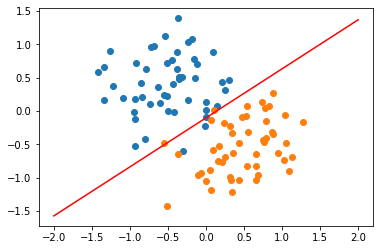

In [98]:
plot_fit(linear_model, X, y)

Text(0, 0.5, 'loss')

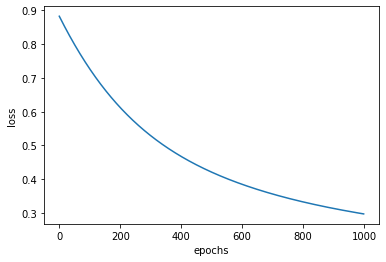

In [92]:
plt.plot(range(epochs), losses)
plt.xlabel('epochs')
plt.ylabel('loss')

In [93]:
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])

Red point positive probability = 0.9200934767723083
Black point positive probability = 0.06027586758136749
Red point in class: 1
Black point in class: 0


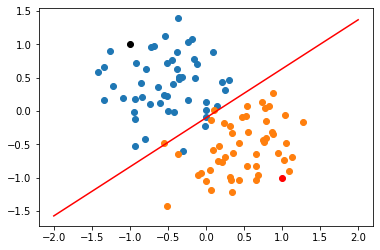

In [99]:
plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')

print("Red point positive probability = " + str(linear_model.forward(point1).item()))
print("Black point positive probability = " + str(linear_model.forward(point2).item()))

print("Red point in class: " + str(linear_model.predict(point1)))
print("Black point in class: " + str(linear_model.predict(point2)))

plot_fit(linear_model, X, y)